In [1]:
import cv2
import numpy as np 
import sys
import matplotlib.pyplot as plt
import os
from PIL import ImageTk, Image

In [3]:
#  set the imge path
ImagePath = "cold.jpeg"

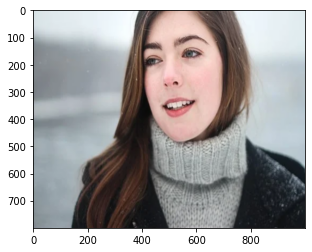

In [4]:
# to read the image
originalmage = cv2.imread(ImagePath)
originalmage = cv2.cvtColor(originalmage, cv2.COLOR_BGR2RGB)
# print(originalmage)  # to print the image  in array format

ReSized1 = cv2.resize(originalmage, (1000, 800)) # ----shape could be changed on the bases of particular image
plt.imshow(ReSized1, cmap='gray')

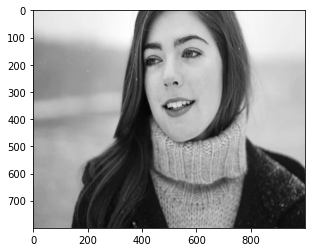

In [5]:
#converting an image to grayscale
grayScaleImage = cv2.cvtColor(originalmage, cv2.COLOR_BGR2GRAY)
ReSized2 = cv2.resize(grayScaleImage, (1000, 800))
plt.imshow(ReSized2, cmap='gray')

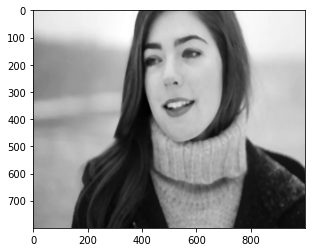

In [6]:
#applying median blur to smoothen the image so, that we can apply outliers
smoothGrayScale = cv2.medianBlur(grayScaleImage, 5)
ReSized3 = cv2.resize(smoothGrayScale, (1000, 800))
plt.imshow(ReSized3, cmap='gray')

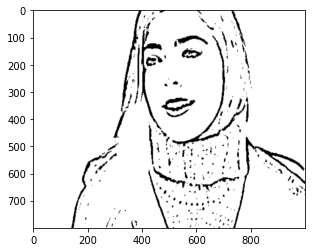

In [7]:
#retrieving the edges for cartoon effect
#by using thresholding technique
getEdge = cv2.adaptiveThreshold(smoothGrayScale, 255, 
  cv2.ADAPTIVE_THRESH_MEAN_C, 
  cv2.THRESH_BINARY, 9, 9)

ReSized4 = cv2.resize(getEdge, (1000, 800))
plt.imshow(ReSized4, cmap='gray')

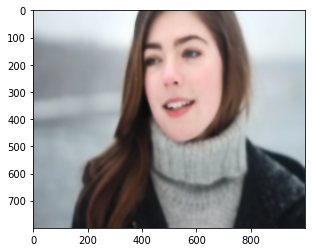

In [8]:
#applying bilateral filter to remove noise 
#and keep edge sharp as required
colorImage = cv2.bilateralFilter(originalmage, 9, 300, 300)
ReSized5 = cv2.resize(colorImage, (1000, 800))
plt.imshow(ReSized5, cmap='gray')

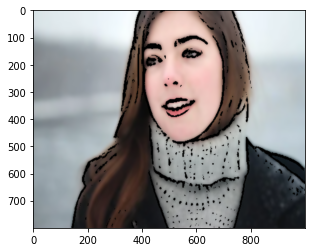

In [9]:
#masking edged image with our "BEAUTIFY" image
cartoonImage = cv2.bitwise_and(colorImage, colorImage, mask=getEdge)

ReSized6 = cv2.resize(cartoonImage, (1000, 800))
plt.imshow(ReSized6, cmap='gray')


In [10]:
path ="cold-out.jpeg"
cv2.imwrite(path, cv2.cvtColor(ReSized6, cv2.COLOR_RGB2BGR))

True

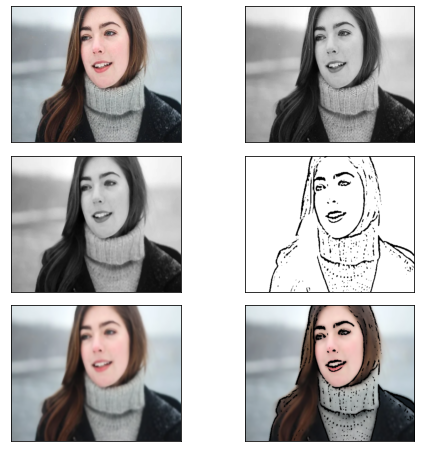

In [12]:
# Plotting the whole transition
images=[ReSized1, ReSized2, ReSized3, ReSized4, ReSized5, ReSized6]
fig, axes = plt.subplots(3,2, figsize=(8,8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')
plt.show()

In [ ]:
# image credits to pixabay.com